In [1]:
import os
import csv
import pandas as pd
import numpy as np
from numpy import fft
from scipy.fftpack import fft
from scipy.fft import fft, fftfreq
# import scipy.integrate as spi
import matplotlib
from  matplotlib import pyplot as plt
# import librosa
from ipywidgets import interact, fixed, FloatSlider
import IPython.display as ipd
from sklearn import preprocessing
from BaselineRemoval import BaselineRemoval
from scipy import sparse
from scipy.sparse.linalg import spsolve
%matplotlib inline


In [320]:
data_arr = []
data_arrx = []
data_arry = []
data_arrxt = []

with open('1024_kc_nano1_result_3.csv','rt') as csvfile:
    rows = csv.reader(csvfile)
    df=pd.read_csv(r'./1024_kc_nano1_result_3.csv')
   
    counting = 0
    for row in rows:
          data_arr.append(row)
    for i in range(0, len(df)+1):
#         data_arrx.append(float(data_arr[i][0])-float(data_arr[1][0]))
#         data_arrx.append(float(data_arr[i][0]))
          data_arry.append(float(data_arr[i][4]))

#         data_arrxt.append(float(data_arr[i][0])-float(data_arr[1][0])
#     data_arry = preprocessing.scale(data_arry)
#     for i in range(1, len(df)-1):
#         data_arrx[i] = (data_arrx[i+1]-data_arrx[i])
#         print(data_arrx[i])
#         if i == 1:
#             data_arry[1] = data_arry[1]*data_arrx[1]
#             print (data_arry[i])
#         else :
#             data_arry[i] = data_arry[i-1] + data_arry[i]*data_arrx[i]
#             print (data_arry[i])
    print(len(data_arry))

300000


In [321]:
data_arr = []
with open('1024_kc_nano1_result_4.csv','rt') as csvfile:
    rows_1 = csv.reader(csvfile)
    df_1=pd.read_csv(r'./1024_kc_nano1_result_4.csv')
   
    counting = 0
    for row in rows_1:
          data_arr.append(row)
    for i in range(0, len(df_1)+1):
#         data_arrx.append(float(data_arr[i][0])-float(data_arr[1][0]))
#         data_arrx.append(float(data_arr[i][0]))
          data_arry.append(float(data_arr[i][4]))
#         data_arrxt.append(float(data_arr[i][0])-float(data_arr[1][0]))
#     data_arry = preprocessing.scale(data_arry)
#     for i in range(1, len(df)-1):
#         data_arrx[i] = (data_arrx[i+1]-data_arrx[i])
#         print(data_arrx[i])
#         if i == 1:
#             data_arry[1] = data_arry[1]*data_arrx[1]
#             print (data_arry[i])
#         else :
#             data_arry[i] = data_arry[i-1] + data_arry[i]*data_arrx[i]
#             print (data_arry[i])
    print(len(data_arry))

600000


<class 'int'>
0.09378411833333333
0.08758331478557145
200000
200000
0.006200803547761857
0.006200803547761885


<Figure size 432x288 with 0 Axes>

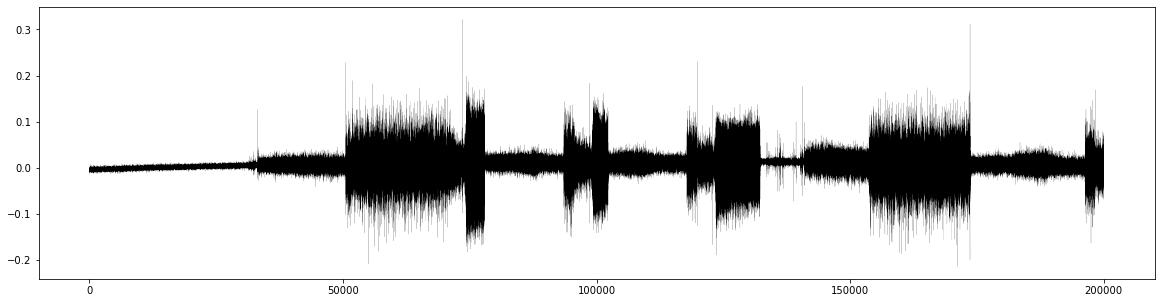

In [322]:
fig = plt.figure()
plt.figure(figsize = (20,5))
ax = plt.axes()

x1 = np.array([])
y1 = np.array([])


# for i in range (0, len(data_arry)):
#     y1 = np.append(y1, data_arry[i])
#     x1 = np.append(x1, i)

remainder = len(data_arry)%3
print (type(remainder))

for i in range (0, int((len(data_arry)-remainder)/3)):
    y1 = np.append(y1, np.mean(data_arry[3*i:(3*i)+3]))
    x1 = np.append(x1, i+1)

# if remainder == 0:
#     print('0')
#     for i in range (0, int(len(data_arry)/3)):
#         y1 = np.append(y1, np.mean(data_arry[3*i:(3*i)+3]))
#         x1 = np.append(x1, i+1)
                           
# elif remainder == 1:
#     print('1')
#     for i in range (0, int((len(data_arry)-1)/3)):
#         y1 = np.append(y1, np.mean(data_arry[3*i:(3*i)+3]))
#         x1 = np.append(x1, i+1)
                           
# else :
#     print ('2')
#     print (int(len(data_arry)-2)/3)
#     for i in range (0, int((len(data_arry)-2)/3)):
#         y1 = np.append(y1, np.mean(data_arry[3*i:(3*i)+3]))
#         x1 = np.append(x1, i+1)
# print (len(y_mean))
        
# print (y[0:5])
# print (np.percentile(y[0:5], 50))
# print (sum(y[0:5])/5)
# print (np.mean(y[0:5]))
# print (np.std(y[0:5]))
# y = preprocessing.scale(y)
# plt.figure(figsize = (20,5))
print(np.mean(y1))
y3 = y1
# y1 = np.subtract(y1, 0.134)
polynomial_degree=2 #only needed for Modpoly and IModPoly algorithm
baseObj=BaselineRemoval(y1)        
y1=baseObj.IModPoly(polynomial_degree)
# print (y1-y3)      
print (np.mean (y3-y1))
print(len(x1))
print(len(y1))
print(np.mean(y1))
different = np.mean(y3-y1)
y3 = y3-different
print(np.mean(y3))
# print (np.percentile(y[0:5], 50))
plt.xticks(np.arange(0, len(x1)+1, 50000))
ax.plot(x1,y1,color = 'k', linewidth=0.1)




110000
110000
0.0079191369938633


<Figure size 432x288 with 0 Axes>

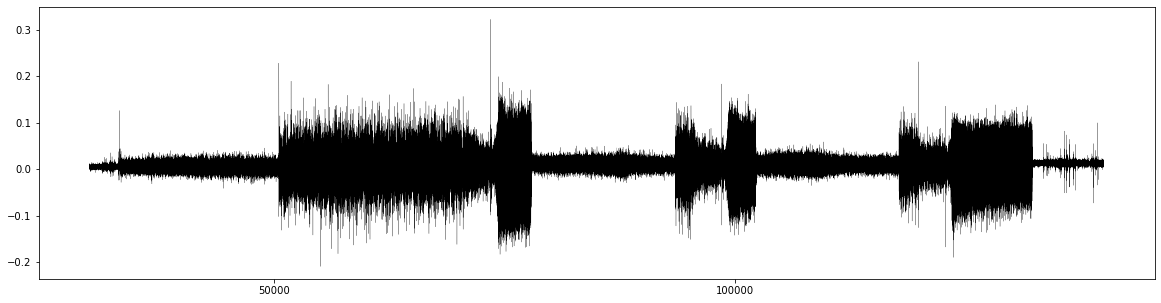

In [323]:
fig = plt.figure()
plt.figure(figsize = (20,5))
ax = plt.axes()
x = np.array([])
y = np.array([])
# 75000、170000可以自己調
for i in range (30000, 140000):
    x = np.append(x, x1[i])
    y = np.append(y, y1[i])

# y = np.square(y)
# y = preprocessing.scale(y)
print(len(x))
print(len(y))
plt.xticks(np.arange(0, len(x), 50000))
ax.plot(x,y,color = 'k', linewidth=0.2)
print (np.mean(y))

In [324]:
data_arryq = data_arry

polynomial_degree=2 #only needed for Modpoly and IModPoly algorithm
baseObj=BaselineRemoval(data_arryq)        
data_arryq=baseObj.IModPoly(polynomial_degree)



3300
3300


<Figure size 432x288 with 0 Axes>

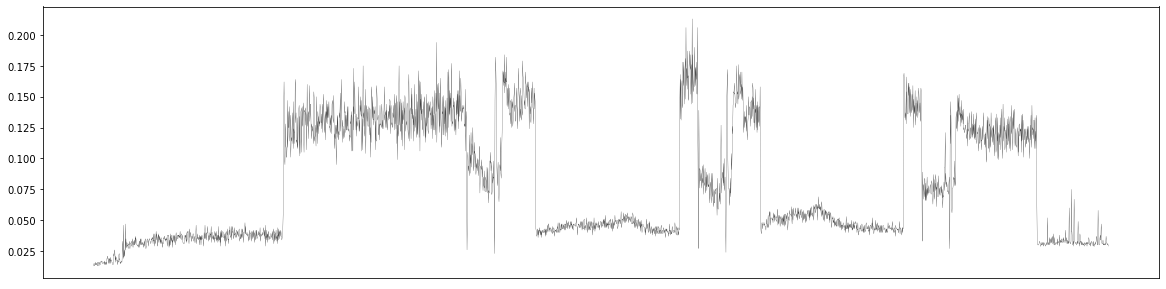

In [325]:
fig = plt.figure()
plt.figure(figsize = (20,5))
ax = plt.axes()

x = np.array([])
y = np.array([])

remainder = len(data_arry)%3

for i in range (int(30000*3/100), int(140000*3/100)):
        temp = np.percentile(data_arryq[100*i:(100*i)+100], 90)
#         temp = np.percentile(data_arry[100*i:(100*i)+100], 90)
        y = np.append(y, round(temp, 3))
        x = np.append(x, i+1)

# y = np.square(y)

# y = np.square(y)
# y = np.multiply(y, 10)
# y = np.square(y)
# print (y[0:5])
# print (np.percentile(y[0:5], 50))
# print (sum(y[0:5])/5)
# print (np.mean(y[0:5]))
# print (np.std(y[0:5]))
# y = preprocessing.scale(y)
# plt.figure(figsize = (20,5))
print(len(x))
print(len(y))
# print (np.percentile(y[0:5], 50))
plt.xticks(np.arange(0, len(x1)+1, 5000))
ax.plot(x,y,color = 'k', linewidth=0.2)

0
3298
3298


<Figure size 432x288 with 0 Axes>

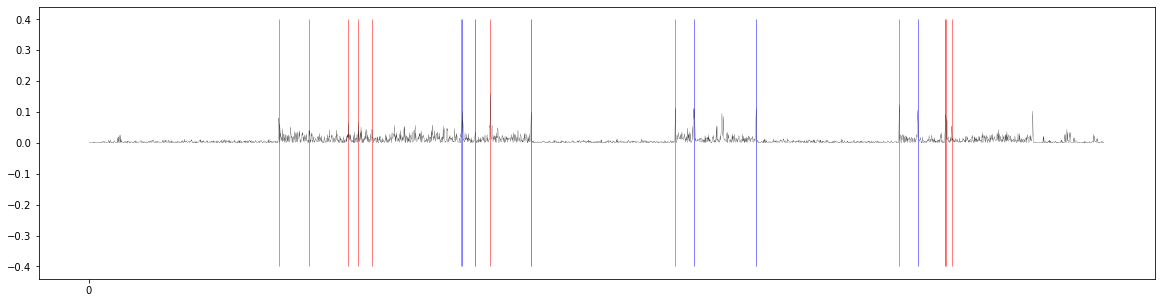

In [326]:
fig = plt.figure()
plt.figure(figsize = (20,5))
ax = plt.axes()

dif_x = np.array([])
dif_y = np.array([])
dif_10 = np.array([])
count = 0
for i in range (2, len(y)) :
        dif_y = np.append(dif_y, abs(y[i]-y[i-2]))
        dif_x = np.append(dif_x, i)
        if len(dif_10)<10:
            dif_10 = np.append(dif_10, abs(y[i-1]-y[i-3]))
        else:
            dif_10 = np.delete(dif_10, 0)
            dif_10 = np.append(dif_10, abs(y[i-1]-y[i-3]))
        dif_mean = np.mean(dif_10)
        dif_mid = np.percentile(dif_10, 50)
#         if abs(y[i]-y[i-2])/dif_mid > 5 and y[i]>0.12 and y[i-1]<0.12:
# #             state = 1
# #             print("red"+str(state))
#             plt.vlines(i,-0.4,0.4,color="red", linewidth=0.5)
#             count+=1
#         if abs(y[i]-y[i-2])/dif_mid > 3.5 and y[i]<0.14 and y[i-1]>0.14:
#             state+=1
#             print(state)
#             plt.vlines(i,-0.4,0.4,color="green", linewidth=0.5)
#             count += 1
        if abs(y[i]-y[i-2])/dif_mean > 4 and y[i]>0.13 and y[i-1]<0.13:
# #             state = 1
# #             print("red"+str(state))
            plt.vlines(i,-0.4,0.4,color="red", linewidth=0.5)
#             count+=1
        if (abs(y[i]-y[i-2])-dif_mean) > 0.1 and y[i]<0.075 and y[i-1]>0.075:
# #             state+=1
# #             print(state)
            plt.vlines(i,-0.4,0.4,color="green", linewidth=0.5)
#             print ("green" + str(i))
#             count += 1
        if (abs(y[i]-y[i-2])-dif_mean) > 0.08 and y[i]<0.15 and y[i-1]>0.15:
            plt.vlines(i,-0.4,0.4,color="orange", linewidth=0.5)
#             print ("orange" + str (i))
        if (abs(y[i]-y[i-2])/dif_mean) > 5 and y[i]<0.075 and y[i-1]>0.075:
            plt.vlines(i,-0.4,0.4,color="blue", linewidth=0.5)
#             print ("blue" + str (i))
#         if abs(y[i]-y[i-2])/ > 10 and y[i]>0.25 and y[i-1]<0.25:

#             plt.vlines(i,-0.4,0.4,color="red", linewidth=0.5)
#             count+=1
#         if (y[i]-y[i-2])< -0.14 and y[i]<0.25 and y[i-1]>0.25:
#             plt.vlines(i,-0.4,0.4,color="green", linewidth=0.5)
#             count +=1

print (count)

print(len(dif_x))
print(len(dif_y))
# print (np.percentile(y[0:5], 50))
plt.xticks(np.arange(0, len(x1)+1, 5000))
# plt.yticks(np.arange(-7.5, 7.5, 1))
ax.plot(dif_x,dif_y,color = 'k', linewidth=0.2)